In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pyod.models.gmm import GMM

normal_path = "fouriers/S01/1/Normal/q_data"
relay_path  = "fouriers/S01/1/Relay/q_data"

with h5py.File("datasets/fouriers_S01_combined.h5", "r") as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    dataset_normal = np.zeros((10916, 72))
    dataset_relay  = np.zeros((9239, 72))

    for i in range(10916):
        try:
            dataset_normal[i] = normal_group[str(i)][:]
        except KeyError:
            continue

    for i in range(9239):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

scalerMinMax = MinMaxScaler()
scalerStandard = StandardScaler()

X_train               = dataset_normal[:9916]
X_test_normal         = dataset_normal[9916:]
X_test_relay          = dataset_relay[8239:]

scalerMinMax.fit(X_train)
X_train_scaled_minmax       = scalerMinMax.transform(X_train)
X_test_norm_scaled_minmax   = scalerMinMax.transform(X_test_normal)
X_test_relay_scaled_minmax  = scalerMinMax.transform(X_test_relay)

scalerStandard.fit(X_train)
X_train_scaled_standard        = scalerStandard.transform(X_train)
X_test_norm_scaled_standard    = scalerStandard.transform(X_test_normal)
X_test_relay_scaled_standard   = scalerStandard.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled_minmax = np.vstack((X_test_norm_scaled_minmax, X_test_relay_scaled_minmax))
X_test_combined_scaled_standard = np.vstack((X_test_norm_scaled_standard, X_test_relay_scaled_standard))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))


Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.99      0.67      1000
       Relay       0.78      0.04      0.08      1000

    accuracy                           0.51      2000
   macro avg       0.65      0.51      0.37      2000
weighted avg       0.65      0.51      0.37      2000



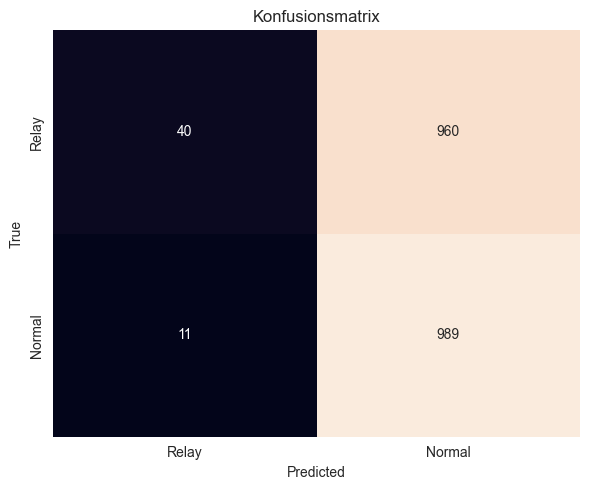


Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.93      0.66      1000
       Relay       0.60      0.10      0.18      1000

    accuracy                           0.52      2000
   macro avg       0.55      0.52      0.42      2000
weighted avg       0.55      0.52      0.42      2000



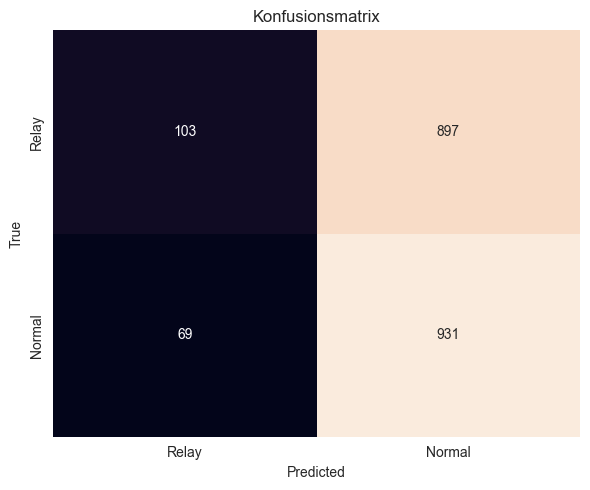


Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.97      0.67      1000
       Relay       0.73      0.07      0.13      1000

    accuracy                           0.52      2000
   macro avg       0.62      0.52      0.40      2000
weighted avg       0.62      0.52      0.40      2000



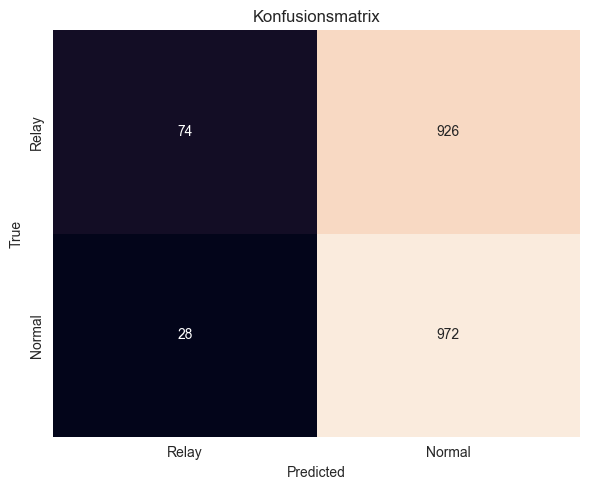


Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.78      0.61      1000
       Relay       0.50      0.22      0.30      1000

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.46      2000
weighted avg       0.50      0.50      0.46      2000



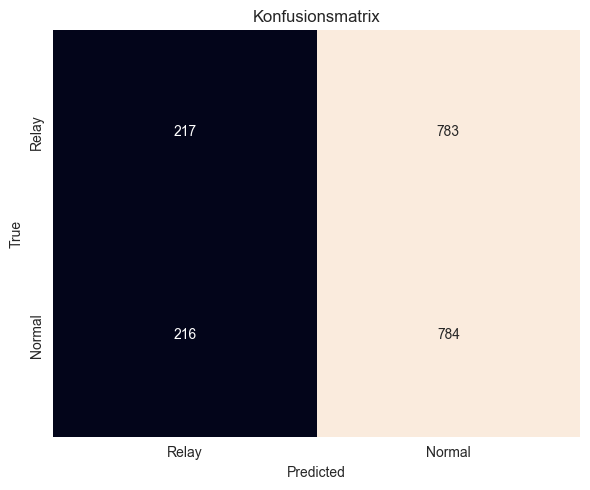

In [6]:
for n in {1,5,10,30}:
    clf = GMM(contamination=0.01, n_components=n)
    clf.fit(X_train)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()


Classification Report:
               precision    recall  f1-score   support

      Normal       0.49      0.77      0.60      1000
       Relay       0.48      0.22      0.30      1000

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.45      2000
weighted avg       0.49      0.49      0.45      2000



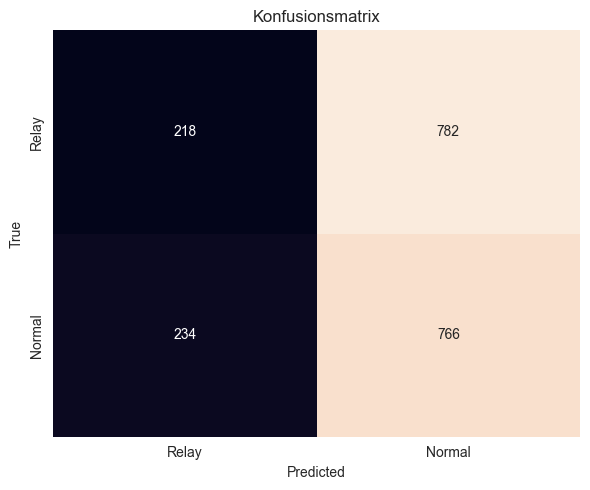

In [3]:

clf = GMM(contamination=0.01, n_components=80, max_iter=500)
clf.fit(X_train)

# pyod.predict: 0 = inlier, 1 = outlier
y_pred = clf.predict(X_test_combined)

# cm und report
cm = confusion_matrix(y_true, y_pred, labels=[1,0])
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

# plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["Relay","Normal"],
            yticklabels=["Relay","Normal"],
            cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Konfusionsmatrix")
plt.tight_layout()
plt.show()

components 1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.99      0.67      1000
       Relay       0.78      0.04      0.08      1000

    accuracy                           0.51      2000
   macro avg       0.65      0.51      0.37      2000
weighted avg       0.65      0.51      0.37      2000



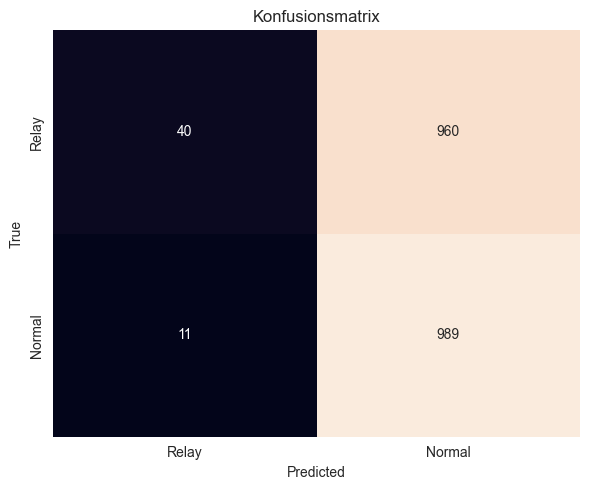

components 10

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.91      0.65      1000
       Relay       0.56      0.12      0.19      1000

    accuracy                           0.51      2000
   macro avg       0.53      0.51      0.42      2000
weighted avg       0.53      0.51      0.42      2000



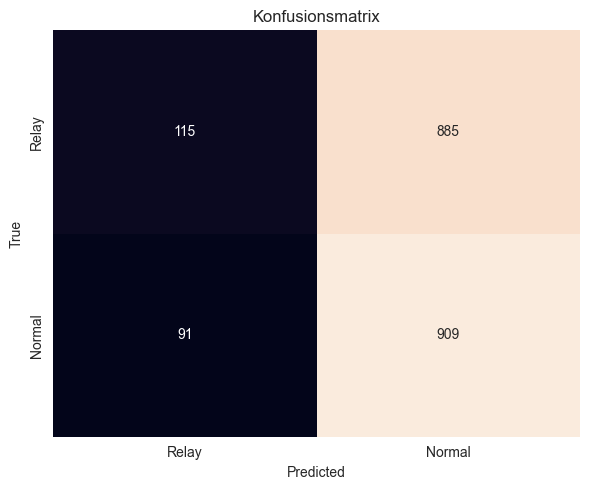

components 5

Classification Report:
               precision    recall  f1-score   support

      Normal       0.52      0.97      0.68      1000
       Relay       0.78      0.09      0.17      1000

    accuracy                           0.53      2000
   macro avg       0.65      0.53      0.42      2000
weighted avg       0.65      0.53      0.42      2000



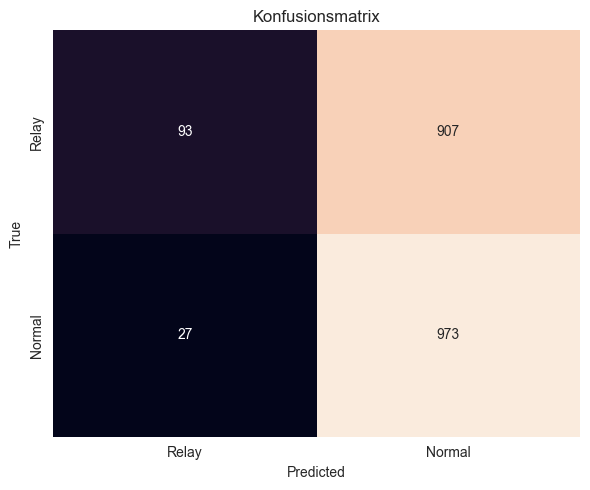

components 30

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.77      0.61      1000
       Relay       0.49      0.22      0.30      1000

    accuracy                           0.50      2000
   macro avg       0.49      0.50      0.45      2000
weighted avg       0.49      0.50      0.45      2000



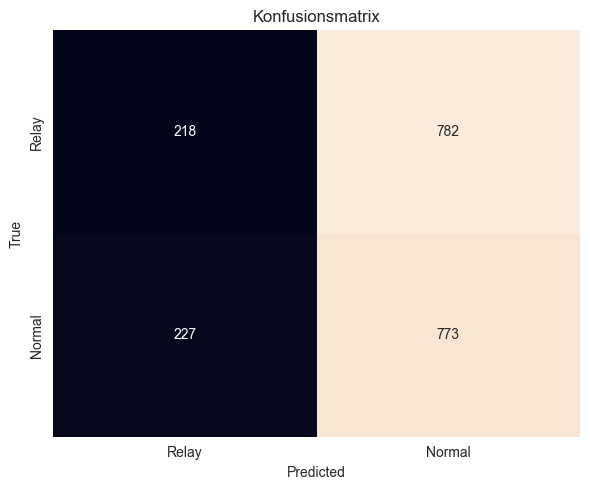

In [4]:
for n in {1,5,10,30}:
    clf = GMM(contamination=0.01, n_components=n)
    clf.fit(X_train_scaled_standard)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled_standard)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"components {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()

components 1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.99      0.67      1000
       Relay       0.78      0.04      0.08      1000

    accuracy                           0.51      2000
   macro avg       0.65      0.51      0.37      2000
weighted avg       0.65      0.51      0.37      2000



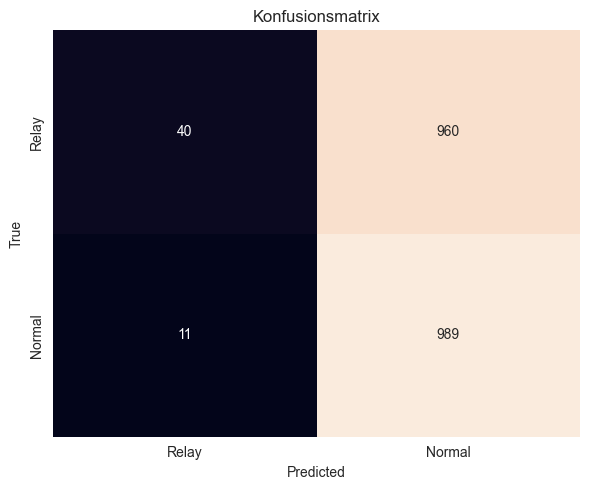

components 10

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.91      0.65      1000
       Relay       0.57      0.12      0.19      1000

    accuracy                           0.51      2000
   macro avg       0.54      0.51      0.42      2000
weighted avg       0.54      0.51      0.42      2000



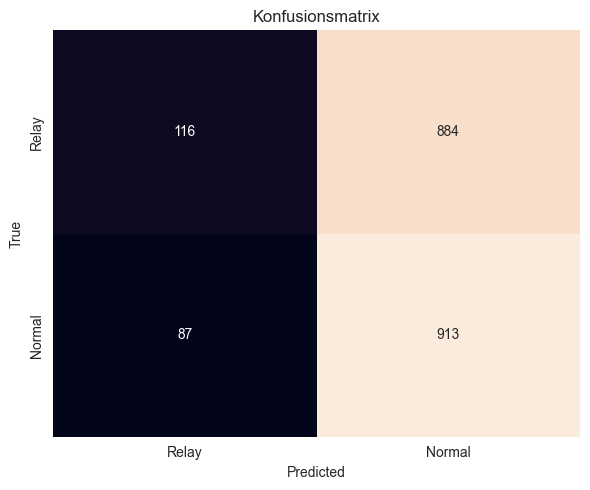

components 5

Classification Report:
               precision    recall  f1-score   support

      Normal       0.52      0.97      0.67      1000
       Relay       0.76      0.09      0.17      1000

    accuracy                           0.53      2000
   macro avg       0.64      0.53      0.42      2000
weighted avg       0.64      0.53      0.42      2000



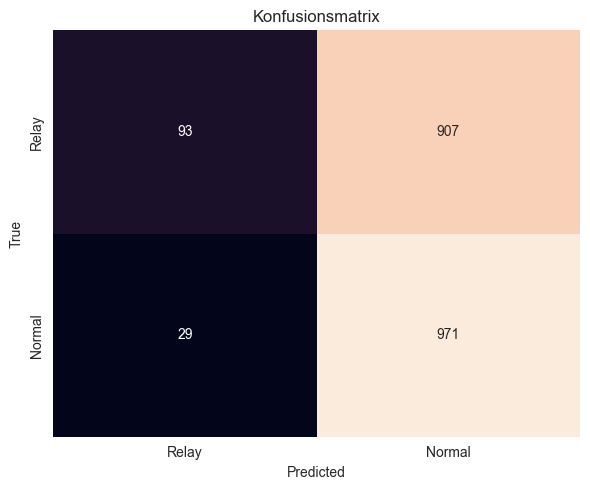

components 30

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.78      0.61      1000
       Relay       0.50      0.22      0.30      1000

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.46      2000
weighted avg       0.50      0.50      0.46      2000



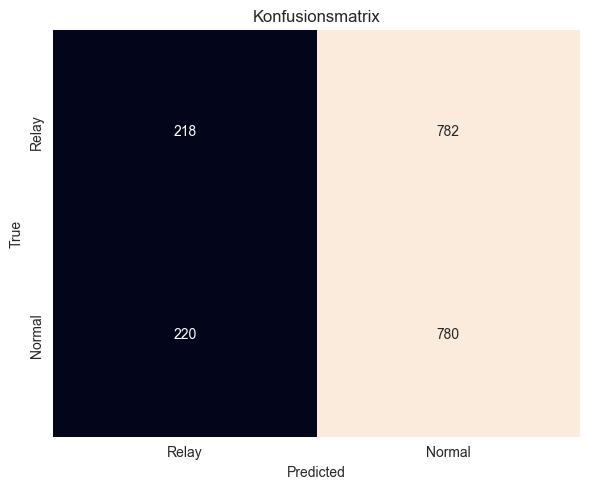

In [5]:
for n in {1,5,10,30}:
    clf = GMM(contamination=0.01, n_components=n)
    clf.fit(X_train_scaled_minmax)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled_minmax)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"components {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()